# British Airways Customer Booking Machine Learning
**Author:** Lester Liam  | [GitHub](https://github.com/lester-liam) | [LinkedIn](https://www.linkedin.com/in/lester-liam) <br/>
**Last Updated:** 27 February 2025
<br/>

This notebook is part of my project for the virtual experience learning on [Forage](https://www.theforage.com/simulations/british-airways/data-science-yqoz). It analyses and trains various Machine Learning algorithms on the British Airways (BA) Customer Bookings Dataset. The objective is to predict whether a customer will book a flight, some applicable use cases may be future customer behavioural analysis.
<br/>

[Download Dataset Link | Forage](https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv)

<hr/>

# Table of Contents

>[Exploratory Data Analysis](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=l8teOaBasWd1)

>[Preprocessing](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=s31JmGoqzxmX)

>[Train Machine Learning Model](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=48h3c712sNX0)

>>[SMOTE Algorithm](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=u-APh8zlvA1s)

>>[Selected Models](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=kFC3eBAGu-Vs)

>>[Feature Selection](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=1a_ToajXu6ic)

>[Train, Tune, Evaluate Best Model](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=w0jO4UCZEChg)

>>[Feature Importance Plot](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=rMinFNLUvRNz)

>[Conclusion](#updateTitle=true&folderId=1Z8b_l1FXKaYcCWJ4a19boeBv_OGcNFHL&scrollTo=IMj8Q0EbvXO6)



In [ ]:
# !pip install country_converter

In [ ]:
# Common Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
# Preprocessing, Evaluation, Pipeline
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Dataset Sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Others
import country_converter as coco # Continent Label

%matplotlib inline

In [ ]:
# Read Dataset
# Note: Default UTF-8 encoding failed, hence using ISO-8859-1 instead
bookings_df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
bookings_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
# Dataset Info
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
# Dataset Description
bookings_df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
# Check for Null Values
bookings_df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


# Exploratory Data Analysis

In this section, we'll go through a few different columns to see what values they have and make any discretization/binning as necessary for preprocessing and feature selection.

array([[<Axes: title={'center': 'num_passengers'}>,
        <Axes: title={'center': 'purchase_lead'}>,
        <Axes: title={'center': 'length_of_stay'}>],
       [<Axes: title={'center': 'flight_hour'}>,
        <Axes: title={'center': 'wants_extra_baggage'}>,
        <Axes: title={'center': 'wants_preferred_seat'}>],
       [<Axes: title={'center': 'wants_in_flight_meals'}>,
        <Axes: title={'center': 'flight_duration'}>,
        <Axes: title={'center': 'booking_complete'}>]], dtype=object)

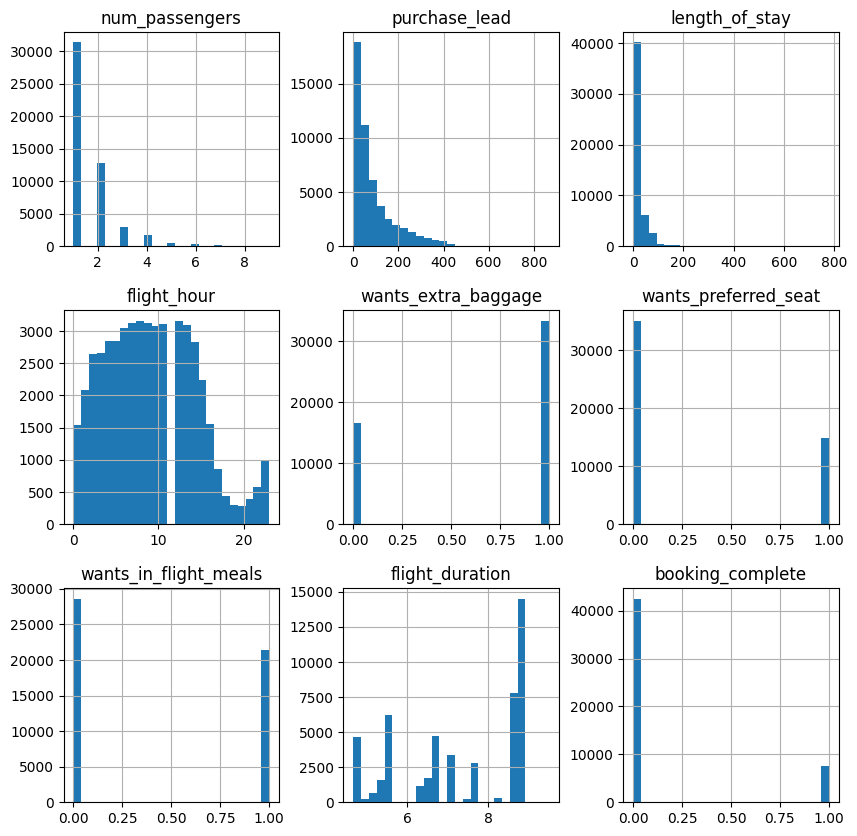

In [ ]:
# Histogram for Numerical Values of Dataset
bookings_df.hist(bins=25, figsize=(10, 10))

Initial Observations of the dataset showed a highly imbalanced dataset (num of complete booking and incomplete). Feature columns are also not well distributed, such as `num_passengers` is heavily skewed to the left (individual travellers)

In [ ]:
# Apply binning for num_passengers
bookings_df['num_passengers_binned'] = pd.cut(
    bookings_df['num_passengers'],
    bins=[1, 2, 5, np.inf],
    labels=['Single', 'Two to Four', 'Five or More'],
    right=False)

# Convert Categorical to Object
bookings_df['num_passengers_binned'].value_counts()

,count
num_passengers_binned,
Single,31352
Two to Four,17529
Five or More,1119


In [ ]:
# Check Sales Channel
bookings_df['sales_channel'].value_counts()

,count
sales_channel,
Internet,44382
Mobile,5618


In [ ]:
# Check Trip Types
bookings_df['trip_type'].value_counts()

,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116


In [ ]:
# Check Booking Origin Value Count
bookings_df['booking_origin'].value_counts()

,count
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387
...,...
Panama,1
Tonga,1
Tanzania,1


There is high number of `booking_origin` that is heavily imbalanced. A country may only have 1 flight, which can heavily affect the model. We can attempt to circumvent this by grouping them by continent instead.

In [ ]:
# Convert booking_origin to continent
bookings_df['booking_continent'] = coco.convert(names=bookings_df['booking_origin'], to='continent')

In [ ]:
# Check New Column
bookings_df['booking_continent'].value_counts()

,count
booking_continent,
Asia,29742
Oceania,18960
Europe,579
America,566
not found,84
Africa,69


In [ ]:
# Rename Not Found to Others instead
bookings_df['booking_continent'] = bookings_df['booking_continent'].replace("not found", "Others")
bookings_df['booking_continent'].value_counts()

,count
booking_continent,
Asia,29742
Oceania,18960
Europe,579
America,566
Others,84
Africa,69


Text(0, 0.5, 'Number of Bookings')

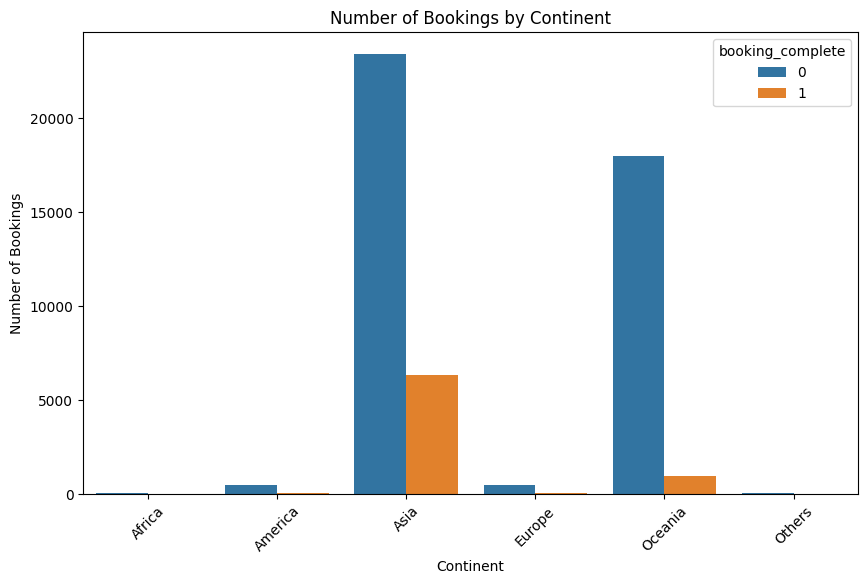

In [ ]:
numBookingByContinent = bookings_df[['booking_continent', 'booking_complete']].groupby(['booking_continent', 'booking_complete']).size().reset_index(name='num_bookings')

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_continent', y='num_bookings', hue='booking_complete', data=numBookingByContinent)
plt.title("Number of Bookings by Continent")
plt.xlabel("Continent")
plt.xticks(rotation=45)
plt.ylabel("Number of Bookings")

We can observe that most bookings come from Asia / Oceania continent. With Asia having the highest number of bookings completed.

In [ ]:
# View Route Value Counts
bookings_df['route'].value_counts()

,count
route,
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801
DMKKIX,744
...,...
LBUTPE,1
CXRMEL,1
DELKBR,1


In [ ]:
# Check Top 10 Route & Booking Distribution

routes_df = bookings_df[['route', 'booking_complete']].copy()
routes_df = routes_df.groupby('route').sum().sort_values(by='booking_complete', ascending=False).reset_index()
routes_df.head(10)

,route,booking_complete
0,AKLKUL,567
1,PENTPE,401
2,DMKKIX,187
3,JHBKTM,164
4,MELPEN,137
5,ICNPEN,135
6,KTMPEN,118
7,CGKHND,105
8,HNDPEN,98
9,CGKKIX,96


In [ ]:
# Look at Tail of Dataset
routes_df.tail()

,route,booking_complete
794,HNDTRZ,0
795,AKLHGH,0
796,HNDOOL,0
797,HNDMLE,0
798,URTXIY,0


We can see that the issue with `Route` is similar to `booking_origin`. We know that certain routes have customers bookings. However, binning them would be challenging. For future evaluations, we can consider getting the route_origin and route_destination which may help.

# Preprocessing

In [ ]:
# Create Copy of Dataset
df = bookings_df.copy()

In [ ]:
# Encode non numerical columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == "category":
        df[col] = label_encoder.fit_transform(df[col])

<Axes: >

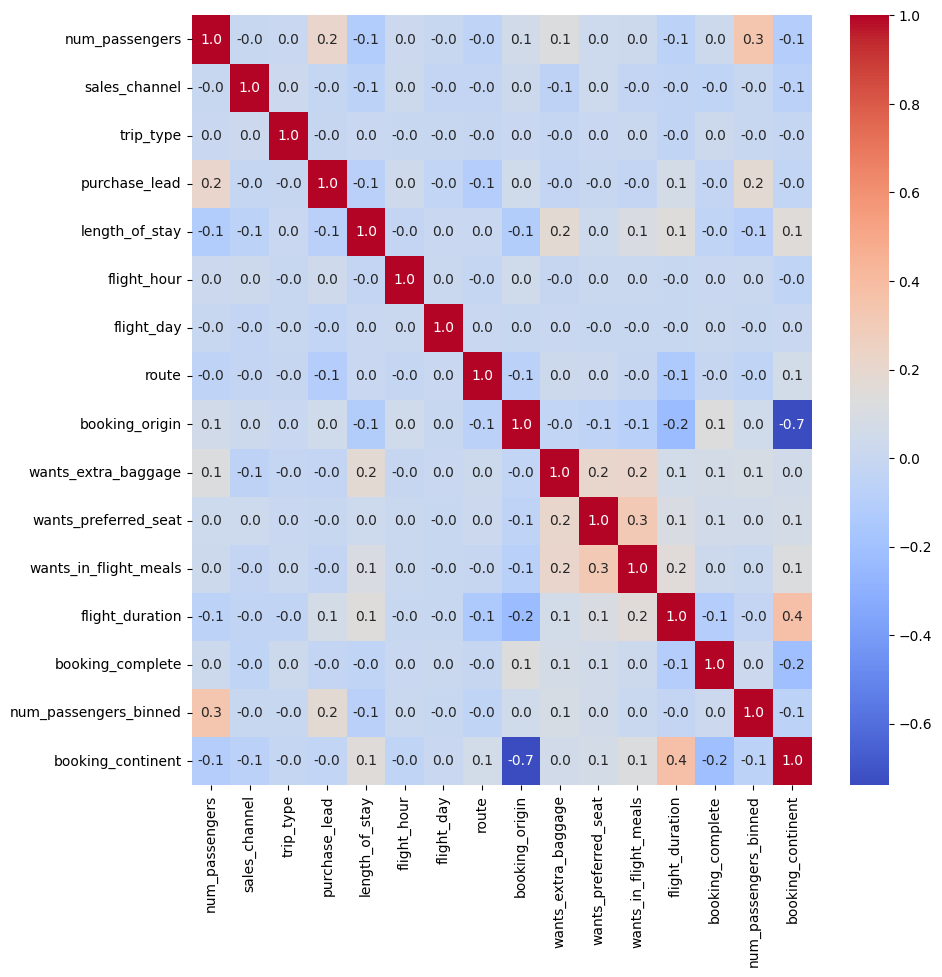

In [ ]:
# Print Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')

We can observe that the no variables have a strong correlation with our target variable. Hence, we'll move to a different feature selection technique (Chi2)

In [ ]:
# Perform Chi2 Square
chi2_scores = chi2(df.drop('booking_complete', axis=1), df['booking_complete'])

chi2_scores_df = pd.DataFrame({
    'feature': df.drop('booking_complete', axis=1).columns,
    'chi2_score': chi2_scores[0],
    'p_value': chi2_scores[1]
})

chi2_scores_df = chi2_scores_df.sort_values(by="chi2_score", ascending=False).reset_index(drop=True)
chi2_scores_df

,feature,chi2_score,p_value
0,booking_origin,23989.282521,0.000000e+00
1,length_of_stay,4480.964772,0.000000e+00
2,purchase_lead,2358.678338,0.000000e+00
3,booking_continent,804.449773,5.815723e-177
4,route,474.865922,2.798465e-105
5,flight_duration,173.831731,1.077287e-39
6,wants_preferred_seat,88.288090,5.658313e-21
7,wants_extra_baggage,76.890347,1.807182e-18
8,sales_channel,74.823889,5.146322e-18
9,wants_in_flight_meals,20.130962,7.231649e-06


**Chi-Squared Test:** <br/>
Chi-squared test checks if there's a significant relationship between two categorical variables by comparing the observed frequencies to the expected frequencies. Essentially, it answers whether the differences in categories are due to chance or if there's a meaningful association.

<hr/>

# Train Machine Learning Model




## SMOTE Algorithm
SMOTE is a over-sampling method that generates new synthethic data by finding k-nearest neighbors to generate new samples in between the line segments. <br/><br/>
This is useful given our number of booked customers is very low which can lead to overfitting of the model.

<hr/>


## Selected Models
For our evaluation, we will be choosing Ridge Classifier for it's easy interpretability, RandomForest and XGBoost which are great at dealing with imbalanced dataset.

<hr/>

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

"""
Trains Ridge Classifer, Random Forest, and XGBoost Model
and prints it's evaluation metrics.

Then, apply SMOTE Sampling on training dataset and refit.
Finally, print new evaluation metrics
"""
def trainModels(x_train, y_train, x_test, y_test):
  # Silence UndefinedMetricWarning
  warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

  # Pipe 1: Ridge Regression
  pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('rr', RidgeClassifier(random_state=42))
  ])

  pipe1.fit(x_train, y_train)
  y_pred = pipe1.predict(x_test)

  print(f"Ridge | Score: {accuracy_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  print("-----\n")

  # Pipe 2: RandomForest
  pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42))
  ])

  pipe2.fit(x_train, y_train)
  y_pred = pipe2.predict(x_test)
  print(f"RandomForest | Score: {accuracy_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  print("-----\n")

  # Pipe 3: XGB
  pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42))
  ])

  pipe3.fit(x_train, y_train)
  y_pred = pipe3.predict(x_test)
  print(f"XGBoost | Score: {accuracy_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  print("-----\n")


  # Retrain with SMOTE Algorithm
  smote = SMOTE(random_state=42)
  x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

  # Refit Pipes & Evaluation
  pipe1.fit(x_train_resampled, y_train_resampled)
  y_pred = pipe1.predict(x_test)
  print(f"Ridge (SMOTE) | Score: {accuracy_score(y_test, y_pred)}")
  print("Score: ", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("-----\n")

  pipe2.fit(x_train_resampled, y_train_resampled)
  y_pred = pipe2.predict(x_test)
  print(f"RandomForest (SMOTE) | Score: {accuracy_score(y_test, y_pred)}")
  print("Score: ", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("-----\n")

  pipe3.fit(x_train_resampled, y_train_resampled)
  y_pred = pipe3.predict(x_test)
  print(f"XGBoost (SMOTE) | Score: {accuracy_score(y_test, y_pred)}")
  print("Score: ", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

## Feature Selection
The following feature selections strategies were selected.

*   Best 5 Features
*   Best 8 Features
*   Best 5 Features (Continent, No Route)
*   Best 8 Features (Continent, No Route)

In [ ]:
# Best 5 Features
best5_feats = chi2_scores_df['feature'][0:6].to_list()
best5_feats.remove('booking_continent') # Redundant Feature

X = df[best5_feats]
Y = df['booking_complete']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
trainModels(x_train1, y_train1, x_test1, y_test1)


Ridge | Score: 0.8504
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

-----

RandomForest | Score: 0.833
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8504
           1       0.39      0.22      0.28      1496

    accuracy                           0.83     10000
   macro avg       0.63      0.58      0.59     10000
weighted avg       0.80      0.83      0.81     10000

-----

XGBoost | Score: 0.8447
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      8504
           1       0.40      0.08      0.13      1496

    accuracy                           0.84     10000
   macro avg       0.63      0.53      0

In [ ]:
# Best 8 Features
best8_feats = chi2_scores_df['feature'][0:9].to_list()
best8_feats.remove('booking_continent') # Redundant Feature
X = df[best8_feats]
Y = df['booking_complete']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
trainModels(x_train2, y_train2, x_test2, y_test2)

Ridge | Score: 0.8504
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

-----

RandomForest | Score: 0.8383
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.41      0.19      0.26      1496

    accuracy                           0.84     10000
   macro avg       0.64      0.57      0.58     10000
weighted avg       0.80      0.84      0.81     10000

-----

XGBoost | Score: 0.8474
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      8504
           1       0.46      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.66      0.55      

In [ ]:
# Best 5 Features with Continent & No Route
best5_feats = chi2_scores_df['feature'][0:7].to_list()
best5_feats.remove('booking_origin')
best5_feats.remove('route')

X = df[best5_feats]
Y = df['booking_complete']

x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
trainModels(x_train3, y_train3, x_test3, y_test3)

Ridge | Score: 0.8504
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

-----

RandomForest | Score: 0.81
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8504
           1       0.28      0.17      0.22      1496

    accuracy                           0.81     10000
   macro avg       0.57      0.55      0.55     10000
weighted avg       0.78      0.81      0.79     10000

-----

XGBoost | Score: 0.8479
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8504
           1       0.34      0.02      0.03      1496

    accuracy                           0.85     10000
   macro avg       0.60      0.51      0.

In [ ]:
# Best 8 Features with Continent & No Route
best8_feats = chi2_scores_df['feature'][0:10].to_list()
best8_feats.remove('booking_origin')
best8_feats.remove('route')

X = df[best8_feats]
Y = df['booking_complete']

x_train4, x_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
trainModels(x_train4, y_train4, x_test4, y_test4)

Ridge | Score: 0.8504
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

-----

RandomForest | Score: 0.8154
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      8504
           1       0.29      0.17      0.21      1496

    accuracy                           0.82     10000
   macro avg       0.58      0.55      0.55     10000
weighted avg       0.78      0.82      0.79     10000

-----

XGBoost | Score: 0.8482
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8504
           1       0.39      0.03      0.05      1496

    accuracy                           0.85     10000
   macro avg       0.62      0.51      

<hr/>


# Train, Tune, Evaluate Best Model
Best Model is XGBoost with 8 Features as it returns the highest precision & recall for booking customer, though there's a tradeoff in accuracy.

In [ ]:
# Best 8 Features
best8_feats = chi2_scores_df['feature'][0:9].to_list()
best8_feats.remove('booking_continent') # Redundant Feature
X = df[best8_feats]
Y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(x_train, y_train)

In [ ]:
# Hyperparameter Tuning for XGBoost
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 8],
    'xgb__min_child_weight': [1, 2, 3],
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42))
])

# Define GridSearch
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc',\
                           n_jobs=1)

# Fit Model
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 200}


In [ ]:
# Define XGB Model with Best Hyperparameters
model = XGBClassifier(
          learning_rate=0.1,
          max_depth=5,
          min_child_weight=3,
          n_estimators=200,
          random_state=42)

# Apply Cross Validation over 10 Folds
cv_result = cross_val_score(
                estimator=model,
                X=x_train_resampled,
                y=y_train_resampled,
                cv=5,
                scoring='accuracy'
              )

# Fit & Predict
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)

# Print Evaluation Report
print("XGBoost Classifier | Fine-Tuned |", model.score(x_test, y_test)*100)
print("Cross Validation Mean Score:", round(cv_result.mean()*100, 4))
print(classification_report(y_test, y_pred))

XGBoost Classifier | Fine-Tuned | 75.64
Cross Validation Mean Score: 81.1499
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      8504
           1       0.32      0.54      0.40      1496

    accuracy                           0.76     10000
   macro avg       0.61      0.67      0.62     10000
weighted avg       0.82      0.76      0.78     10000



## Feature Importance Plot

In [ ]:
feature_importance = model.get_booster().get_fscore()
feature_importance_df = pd.DataFrame({
    'feature': list(feature_importance.keys()),
    'importance': list(feature_importance.values())
})\
.sort_values(by='importance', ascending=False)\
.reset_index(drop=True)

# Display Feature Importance Table
feature_importance_df

,feature,importance
0,route,1213.0
1,booking_origin,1016.0
2,flight_duration,900.0
3,purchase_lead,784.0
4,length_of_stay,666.0
5,wants_extra_baggage,115.0
6,wants_preferred_seat,82.0
7,sales_channel,59.0


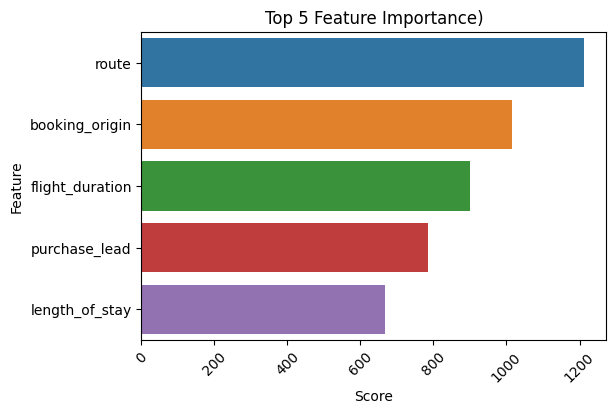

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x='importance', y='feature', data=feature_importance_df[0:5], hue='feature')

plt.title("Top 5 Feature Importance)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.show()

# Conclusion

SMOTE returns the best detection model for Booking Customers, with the trade off being higher False Positive Rate (due to lower precision) and lower overall accuracy. <br/>

Without sampling returns the best accuracy model for Non-Booking Customer, with a significantly poorer detection rate (low recall), but slightly better False Positive Rate (higher precision) <br/>

Depending on British Airways (BA) needs, a higher detection rates at the expense of precision may be better at it can capture for customers who will make a booking. However, if the cost of misclassifying is high, it may be better to choose a more conservative model (without sampling) instead.

<hr/>